# Data Representativeness Walkthrough

### Introduction

### Loading our data

Remember that our data involves SAT scores from NYC schools.

In [9]:
import pandas as pd
url = 'https://raw.githubusercontent.com/analytics-engineering-jigsaw/data-visualization/main/2-storytelling/1-what-to-focus-on/sat_scores.csv'
df = pd.read_csv(url, index_col = 0)

In [10]:
df[:2]

,dbn,name,num_test_takers,reading_avg,math_avg,writing_score,boro,total_students,graduation_rate,attendance_rate,college_career_rate
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0,M,171,0.66,0.87,0.36
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,M,465,0.90,0.93,0.70


And we can clean up our data, and then group it by borough.

In [11]:
df['boro'].unique()

array(['M', 'X', 'K', 'Q', 'R'], dtype=object)

> We replace the borough information with the [original names](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City).

In [13]:
keys = ['M', 'X', 'K', 'Q', 'R']
values = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
dictionary = dict(zip(keys, values))

In [14]:
dictionary

{'M': 'Manhattan',
 'X': 'Bronx',
 'K': 'Brooklyn',
 'Q': 'Queens',
 'R': 'Staten Island'}

In [16]:
boro_updated = df['boro'].replace(dictionary)
boro_updated[:2]

0    Manhattan
1    Manhattan
Name: boro, dtype: object

In [ ]:
boro_updated = df['boro'].replace(dictionary)
df_updated = df.assign(boro = boro_updated)

In [20]:
df_updated = df.assign(boro = boro_updated)
df_updated[:2]

,dbn,name,num_test_takers,reading_avg,math_avg,writing_score,boro,total_students,graduation_rate,attendance_rate,college_career_rate
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29.0,355.0,404.0,363.0,Manhattan,171,0.66,0.87,0.36
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91.0,383.0,423.0,366.0,Manhattan,465,0.90,0.93,0.70


> And then group by the borough.

In [5]:
avg_by_boro = df_updated.groupby('boro').mean(numeric_only = True)
avg_by_boro[['math_avg', 'reading_avg']].sort_values('math_avg', ascending = False)
# avg_by_boro

,math_avg,reading_avg
boro,,
Staten Island,472.500000,457.500000
Queens,450.650000,423.916667
Manhattan,442.886076,426.696203
Brooklyn,404.030612,391.255102
Bronx,394.000000,384.237500


### Data quality

In [23]:
df_updated.isna().sum()

dbn                     0
name                    0
num_test_takers        29
reading_avg            29
math_avg               29
writing_score          29
boro                    0
total_students          0
graduation_rate         5
attendance_rate         0
college_career_rate     5
dtype: int64

In [25]:
# df_updated

### Exploring Missing Data

1. Missing Observations (Rows) of Data

Now one question, we may have is simply, do we have all of the data from each county.  Let's use value_counts to find out.

In [26]:
df_updated['boro'].value_counts()

Brooklyn         104
Manhattan         90
Bronx             87
Queens            65
Staten Island     10
Name: boro, dtype: int64

<AxesSubplot: >

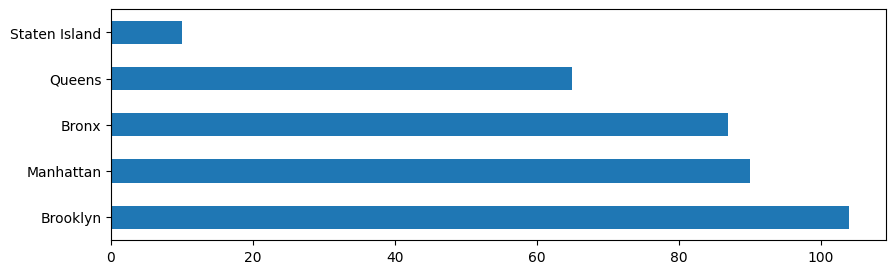

In [27]:
df_updated['boro'].value_counts().plot(kind = 'barh', figsize= (10, 3))

So we can see we have very few number of high schools in staten island -- but this doesn't necessarily mean the data is missing.

For that we can look at an [outside resource](https://high-schools.com/directory/ny/cities/staten-island/), and it looks like there are only 27 high schools in staten island, and 280 in brooklyn.  

* Test takers per school

In [29]:
num_test_takers = df_updated['num_test_takers']
total_students = df_updated['total_students']

In [34]:
# total_students

In [36]:
pct_takers = num_test_takers/total_students

In [38]:
df_with_pct = df_updated.assign(pct_takers = pct_takers)
df_with_pct.groupby('boro').mean()['pct_takers']

/var/folders/56/76xkbl_1039gpjh3w47v01980000gn/T/ipykernel_85222/2661955041.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_with_pct.groupby('boro').mean()['pct_takers']


boro
Bronx            0.146833
Brooklyn         0.168416
Manhattan        0.171484
Queens           0.153365
Staten Island    0.161102
Name: pct_takers, dtype: float64

### Missing or incorrect values

* Na values

* Distributions of the data - hist

array([[<AxesSubplot: title={'center': 'reading_avg'}>,
        <AxesSubplot: title={'center': 'math_avg'}>]], dtype=object)

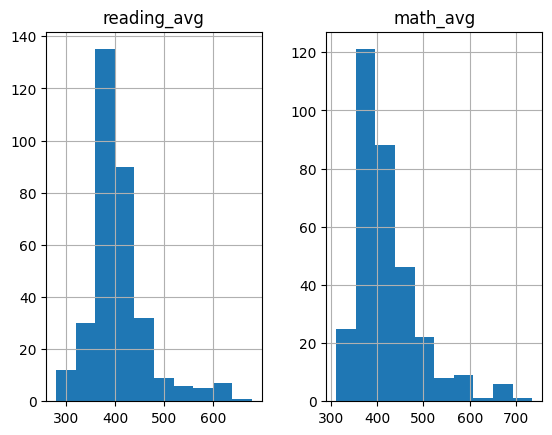

In [40]:
b[['reading_avg', 'math_avg']].hist()

In [44]:
df_with_pct.isna().sum()

dbn                     0
name                    0
num_test_takers        29
reading_avg            29
math_avg               29
writing_score          29
boro                    0
total_students          0
graduation_rate         5
attendance_rate         0
college_career_rate     5
pct_takers             29
dtype: int64

### One last thing

Looking at the data

### Missing data - it's not all bad

In [42]:
df_with_pct['pct_takers'].describe()

count    327.000000
mean       0.160892
std        0.077814
min        0.041916
25%        0.118438
50%        0.151462
75%        0.190515
max        0.974170
Name: pct_takers, dtype: float64

In [ ]:
df_with_pct['pct_takers']